In [1]:
# Let us load in the relevant Python modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
from collections import Counter
from sklearn.feature_selection import mutual_info_classif
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('../PortoSeguro/train_reduce2.csv')

In [3]:
# Taking a look at how many rows and columns the train dataset contains 

rows    = train.shape[0]
columns = train.shape[1]

print("The train dataset contains {0} rows and {1} columns".format(rows, columns))

The train dataset contains 49999 rows and 59 columns


### Data Quality checks

**Null or missing values check**  
As part of out qulity checks, let us quick look at whether there are any null values in the train dataset as follows:

In [4]:
# any() applied twice to check run the isnull check across all columns.
train.isnull().any().any()

False

Here we can see that which columns contained -1 in their values so we could easily for example make a blanket replacement of all -1 with nulls first as follows:

In [5]:
train_copy = train
train_copy = train_copy.replace(-1, np.NaN)

Next, we can use resident Kaggler's Aleksey Bilogur - creator of the "Missingno"   
package which is a most useful and convenient tool in visualising missing values in the   
dataset, so check it out.

In [6]:
import missingno as msno

<AxesSubplot:>

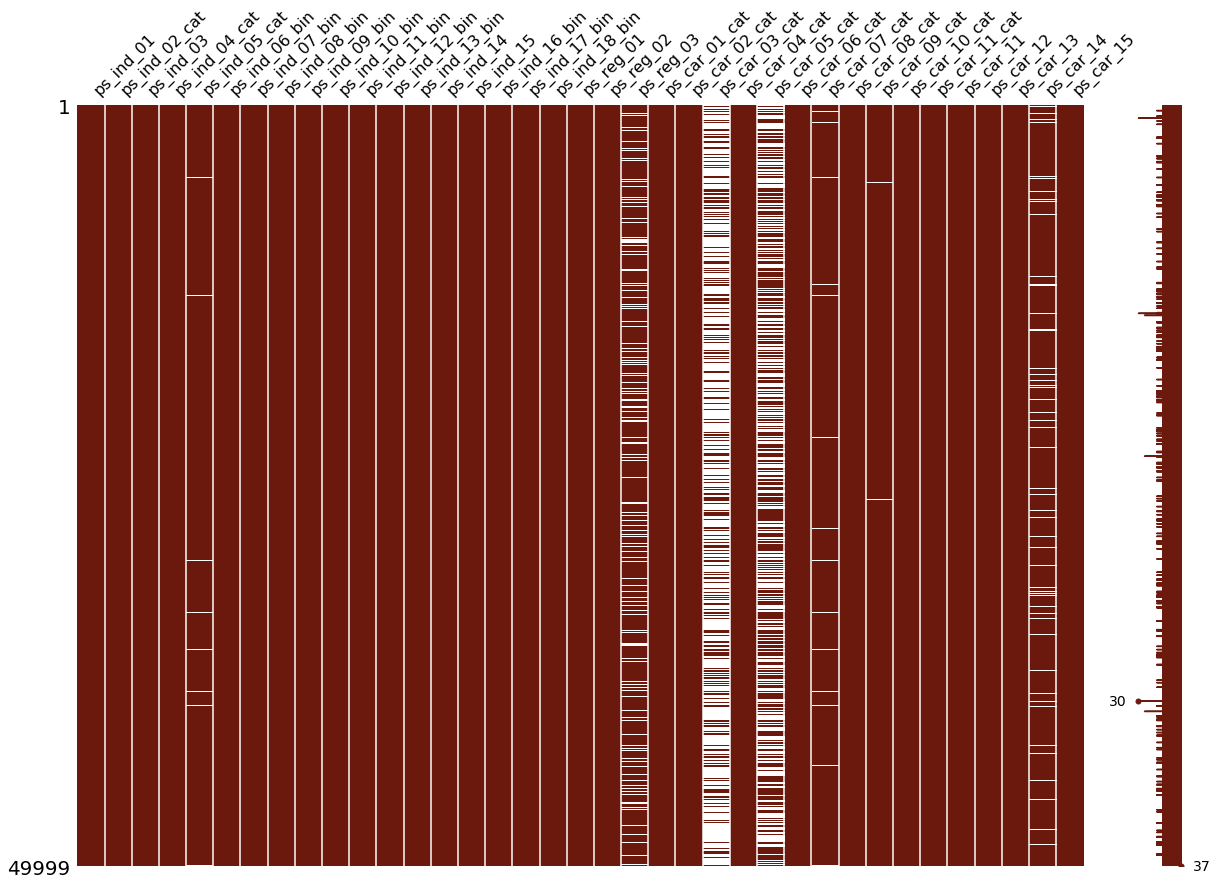

In [8]:
msno.matrix(df=train_copy.iloc[:,2:39], figsize=(20,14), color=(0.42, 0.1, 0.05))

**For the 7 null columns that we are able to observe, they are hence listed here as follows:**

ps_ind_05_cat | ps_reg_03 | ps_car_03_cat | ps_car_05_cat | ps_car_07_cat | ps_car_09_cat | ps_car_14

**Target variable inspection**

In [10]:
data = [go.Bar(
            x = train["target"].value_counts().index.values,
            y = train["target"].value_counts().values,
            text='Distribution of target variable'
    )]

layout = go.Layout(
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

#### Datatype check

In [11]:
Counter(train.dtypes.values)

Counter({dtype('int64'): 49, dtype('float64'): 10})

In [12]:
train_float = train.select_dtypes(include=['float64'])
train_int   = train.select_dtypes(include=['int64'])

## Correlation plots

**Correlation of float features**

<AxesSubplot:title={'center':'Pearson correlation of continuous features'}>

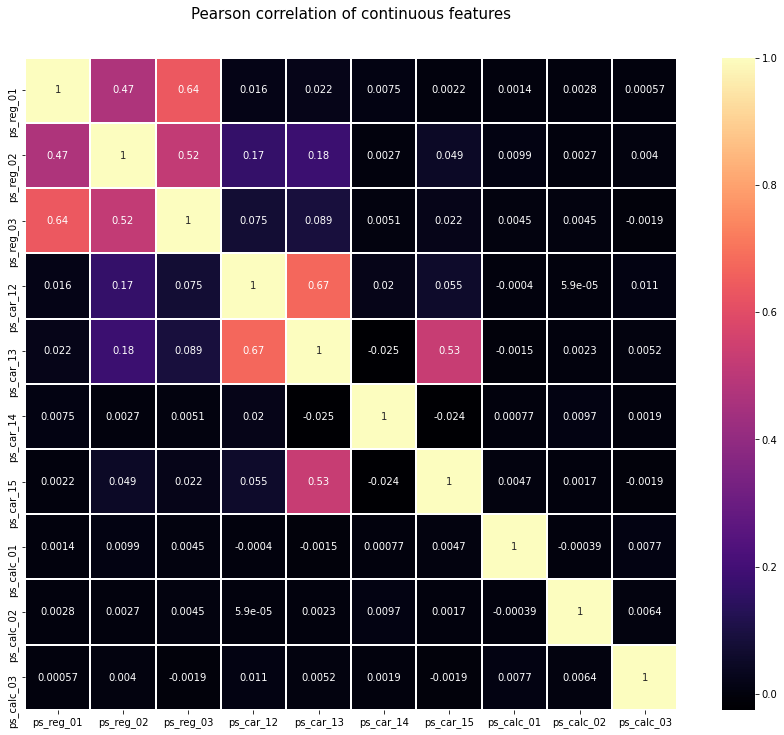

In [13]:
colormap = plt.cm.magma
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(train_float.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

**(ps_reg_01, ps_reg_03)  
(ps_reg_02, ps_reg_03)  
(ps_car_12, ps_car_13)  
(ps_car_13, ps_car_15)**  

#### Correlation of integer features

In [14]:
#train_int = train_int.drop(["id", "target"], axis=1)
# colormap = plt.cm.bone
# plt.figure(figsize=(21,16))
# plt.title('Pearson correlation of categorical features', y=1.05, size=15)
# sns.heatmap(train_cat.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=False)
data = [
    go.Heatmap(
        z= train_int.corr().values,
        x=train_int.columns.values,
        y=train_int.columns.values,
        colorscale='Viridis',
        reversescale = False,
        #text = True ,
        opacity = 1.0 )
]

layout = go.Layout(
    title='Pearson Correlation of Integer-type features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

**Negatively correlated features:**   
ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin

## Mutual Information plots

In [15]:
mf = mutual_info_classif(train_float.values, train.target.values, n_neighbors=3, random_state=17)
print(mf)

[0.001249   0.00143669 0.00071617 0.00157977 0.00145187 0.00252753
 0.00258556 0.00013355 0.00017948 0.        ]


### Binary features inspection 

In [16]:
bin_col = [col for col in train.columns if '_bin' in col]
zero_list = []
one_list = []
for col in bin_col:
    zero_list.append((train[col]==0).sum())
    one_list.append((train[col]==1).sum())

In [ ]:
trace1 = go.Bar(
    x=bin_col,
    y=zero_list ,
    name='Zero count'
)
trace2 = go.Bar(
    x=bin_col,
    y=one_list,
    name='One count'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title='Count of 1 and 0 in binary variables'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

Here we observe that there are 4 features : ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin which are completely dominated by zeros

### Categorical And Ordinal feature inspection  
Let us first take a look at the features that are termed categorical as per their suffix "_cat".

## Feature importance via Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=150, max_depth=8, min_samples_leaf=4, max_features=0.2, n_jobs=-1, random_state=0)
rf.fit(train.drop(['id','target'],axis=1), train.target)
features = train.drop(['id', 'target'],axis=1).columns.values
print("----- Training Done -----")

----- Training Done -----


asdasasdasd
dasdsaasdas